In [1]:
# MNIST784 Dataset --> we are going to use, contains gray-scale images of hand-drawn digits 0-9
# Each image 28 pixels height and 28 pixels width for totla 784 pixels
# In training set there are 60,000 images and in test set we have 10,000 images for testing purposes.

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml #to download MNIST dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#this operation can takes several minutes
mnist = fetch_openml('mnist_784')



/Users/enes/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.data.shape #70,000 total images, 784 pixels total

(70000, 784)

In [3]:
def ShowImage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

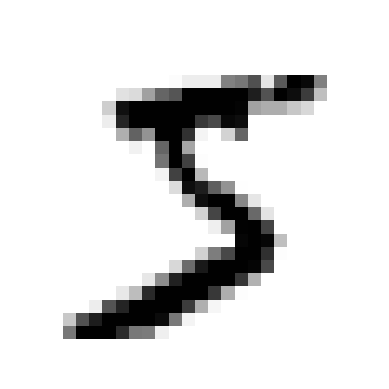

In [4]:
ShowImage(mnist.data,0)

In [5]:
#test and train ratio 1/7 and 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
test_img_copy = test_img.copy()

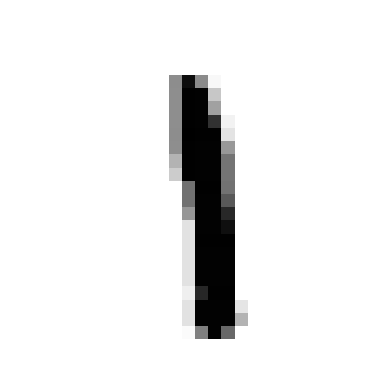

In [8]:
ShowImage(test_img_copy,2)

In [9]:
#We need to scale our data for PCA by using StandardScaler

scaler = StandardScaler()

#we only need to make the scaler fit on the training set
scaler.fit(train_img)

#we need to transform both set, training and test
train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)



In [10]:
#We will apply PCA algorithm
# Variance protected by 95%

pca_model = PCA(0.95)

In [11]:
#We need to apply our PCA algorithm to our training dataset
pca_model.fit(train_img)

PCA(n_components=0.95)

In [12]:
# How many dimension it reduce from 784?
print(pca_model.n_components_)

327


In [13]:
# We need to reduce our test and train datasets from 784 to 327
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

In [14]:
# Time to logistic regression. We used lbfgs solver to get faster result
logistic_Regr = LogisticRegression(solver='lbfgs',max_iter=10000)

#Now we train our data it can take a few minutes code below.

In [15]:
logistic_Regr.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [16]:
logistic_Regr.predict(test_img[1].reshape(1,-1))
#we try our project

array(['4'], dtype=object)

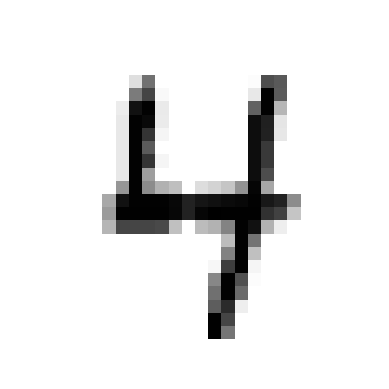

In [17]:
ShowImage(test_img_copy,1)
# we can see it predict corretly

In [21]:
logistic_Regr.score(test_img,test_lbl)
#it is correct 91%

0.9184